In [3]:
import pandas as pd
import numpy as np

In [368]:
base_models = ['gpt2', 't5-base', 'bert-base-uncased']
csv_files = []
dfs = []

for m in base_models:
    csv_files.append(f'../data/adversarial-attacks/tf-{m}.csv')

    # Read the CSV file into a pandas DataFrame
    df1 = pd.read_csv(csv_files[-1])
    dfs.append(df1)

def was_success(df, i):
    return df.iloc[i]['result_type'] == 'Successful'

for i in range(10000):
    if was_success(dfs[0], i) and was_success(dfs[2], i) and not was_success(dfs[1], i):
        #assert(dfs[0].iloc[i]['original_text'] == dfs[1].iloc[i]['original_text'] and dfs[1].iloc[i]['original_text'] == dfs[2].iloc[i]['original_text'])
        #print(dfs[0].iloc[i]['original_text'])
        #print(dfs[1].iloc[i]['original_text'])
        print(dfs[2].iloc[i]['original_text'])
        print('^^^^^^^^')
        break


A new wrestling show paves way for the most feared wrestler ever imaginable, the giant Zeus. Network President Brell does everything in his power to draw WWF champion Rip into the squared circle to face off against Zeus for the championship of the 'Battle of the Tough Guys'. But Zeus is unlike any competitor Rip has ever faced.<br /><br />Normally I would give Hogan some leeway as a wrestler crossing over into a movie role, however this film didn't ask the Hulkster to make very much of a stretch, it simply asked Hogan to play himself, which he failed at [[miserably]]. 'Tiny' Lister made a good effort as the mighty Zeus, but even his work left the film [[lacking]] something, namely acting!<br /><br />Watch this movie, if you so desire, with a [[grain]] of salt and a sense of humor, otherwise you will probably have to turn it off a little over ten minutes in.
^^^^^^^^


In [63]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification 

# Define the model name (e.g., distilbert-base-uncased)
model_name = "bert-base-uncased"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification .from_pretrained(model_name)

def run(text):
    # Tokenize the text
    encoded_input = tokenizer(text, return_tensors="pt")
    
    # Get relative depth (between 0 and 1)
    relative_depth = 1  # Adjust this value between 0 and 1
    
    # Calculate absolute layer index based on relative depth
    num_layers = model.config.num_hidden_layers
    absolute_layer_idx = int(relative_depth * (num_layers - 1))
    
    # Run model inference
    outputs = model(**encoded_input, output_hidden_states=True)
    
    # Get hidden states
    if 't5' in model_name:
        hidden_states = outputs.encoder_hidden_states
    else:
        hidden_states = outputs.hidden_states
    
    # Access hidden representation at the specified layer
    target_hidden_state = hidden_states[absolute_layer_idx]
    
    # Get the actual tensor containing the hidden representations
    target_hidden_state = target_hidden_state.squeeze(0)  # Remove batch dimension

    input_hidden_state = hidden_states[0].squeeze(0)
    
    # Print the shape of the hidden representation tensor
    print(f"Hidden representation shape at layer {absolute_layer_idx + 1}: {target_hidden_state.shape}")

    return target_hidden_state, input_hidden_state
    
    # You can further process the hidden representation tensor here (e.g., convert to numpy array)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [451]:
text = "The book Paul and I read was horrible"
run()
encodedinput1 = input_hidden_state
hiddenstate1 = target_hidden_state

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Hidden representation shape at layer 8: torch.Size([10, 768])


In [452]:
text = "The book Paul and I read was great"
run()
hiddenstate2 = target_hidden_state
encodedinput2 = input_hidden_state

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Hidden representation shape at layer 8: torch.Size([10, 768])


In [453]:
text = "The novel Paul and I read was awful"
run()
hiddenstate3 = target_hidden_state
encodedinput3 = input_hidden_state

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Hidden representation shape at layer 8: torch.Size([10, 768])


In [454]:
hiddenstate1_orig = hiddenstate1
hiddenstate2_orig = hiddenstate2
hiddenstate3_orig = hiddenstate3

In [455]:
hiddenstate1 = np.mean(hiddenstate1.detach().numpy(), axis=0)
hiddenstate2 = np.mean(hiddenstate2.detach().numpy(), axis=0)
hiddenstate3 = np.mean(hiddenstate3.detach().numpy(), axis=0)

In [456]:
encodedinput3 = np.mean(encodedinput3.detach().numpy(), axis=0)
encodedinput2 = np.mean(encodedinput2.detach().numpy(), axis=0)
encodedinput1 = np.mean(encodedinput1.detach().numpy(), axis=0)

In [23]:
from numpy.linalg import norm

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

def cos_sim(x, y):
    #return cosine_similarity(x, y)
    dot_prod = np.dot(x, y)
    return dot_prod / (norm(x) * norm(y))

In [459]:
cos_sim(encodedinput1, encodedinput2)

0.9595605

In [460]:
cos_sim(encodedinput1, encodedinput3)

0.9468869

In [461]:
cos_sim(hiddenstate1, hiddenstate2)

0.97664976

In [462]:
cos_sim(hiddenstate1, hiddenstate3)

0.984921

In [53]:
anger_list = [
    'anger',
    'angry'
]

strong_anger_list = [
    'fury',
    'wrath',
    'outrage'
]

socially_acceptable_list = [
    'frustrated',
    'disappointed',
    'upset',
    'annoyed',
    'irritated'
]

other_emotions_list = [
    'happy',
    'sad',
    'afraid',
    'inadequate',
    'hurt'
]

violence_list = [
    'bully',
    'threaten',
    'harm',
    'destruction',
    'brutality',
    'cruelty'
]

In [64]:
def get_embeddings(word_list_list):
    to_ret = []
    
    for word_list in word_list_list:
        current = []
        for w in word_list:
            target_hidden_state, input_hidden_state = run(w)
            encodedinput1 = input_hidden_state
            hiddenstate1 = target_hidden_state
            hiddenstate1 = np.mean(hiddenstate1.detach().numpy(), axis=0)
            
            current.append((w, hiddenstate1))
        to_ret.append(current)
    return to_ret

In [65]:
anger, strong_anger, socially_acceptable, other_emotions, violence = get_embeddings([anger_list, strong_anger_list, socially_acceptable_list, other_emotions_list, violence_list])

Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden representation shape at layer 12: torch.Size([3, 768])
Hidden r

In [66]:
embedding_lists = [anger, strong_anger, socially_acceptable, other_emotions, violence]

In [67]:
def avg_word_dist(list1, list2):
    """
    I think you have to average the vectors first unfortunately :'(
    
    cnt = 0
    total_dist = 
    
    for a in list1:
        for b in list2:
            cnt += 1
            total_dist += 
    """

    vec1 = np.sum(np.array(list1), axis=0)
    vec2 = np.sum(np.array(list2), axis=0)

    return cos_sim(vec1, vec2)

In [68]:
def process(L):
    newL = []
    for (a, b) in L:
        newL.append(b)
    return newL

In [69]:
n = 5
matrix = [[-5 for i in range(n)] for i in range(n)]

for i in range(n):
    for j in range(i, n):
        matrix[i][j] = matrix[j][i] = avg_word_dist(process(embedding_lists[i]), process(embedding_lists[j]))

In [70]:
for l in embedding_lists:
    print(l[0][1][:5])

[-0.46766603  0.22718944 -0.46782348 -0.17147277 -0.18608527]
[-0.50101864  0.32310155 -0.5099326   0.01260257 -0.38356152]
[-0.31426224  0.01640645 -0.21132796 -0.27653217 -0.11179075]
[-0.47098503  0.03896577  0.00118029 -0.02375147 -0.05365406]
[-0.33295277  0.04669252 -0.48365852 -0.30317208 -0.1812845 ]


In [71]:
matrix

[[0.99999994, 0.90397793, 0.8881038, 0.8647869, 0.87336075],
 [0.90397793, 0.99999994, 0.90104824, 0.8985372, 0.92639714],
 [0.8881038, 0.90104824, 1.0000001, 0.9500612, 0.9058974],
 [0.8647869, 0.8985372, 0.9500612, 1.0, 0.9297176],
 [0.87336075, 0.92639714, 0.9058974, 0.9297176, 1.0000001]]

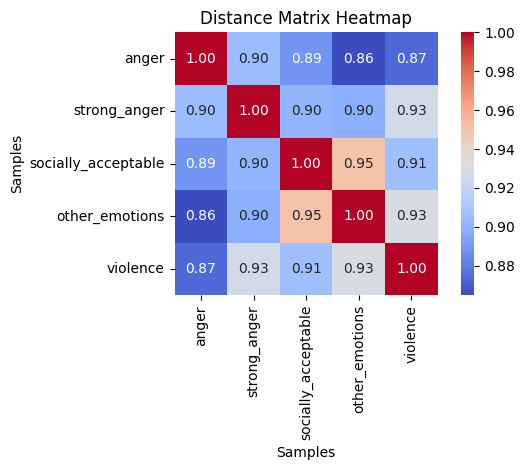

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def distance_matrix_heatmap(distance_matrix, labels):
    """
    This function generates a heatmap visualization of a distance matrix with labels.
    
    Args:
      distance_matrix: A 2D numpy array representing the distance matrix.
      labels: A list of labels for the rows and columns of the distance matrix.
    """
    sns.heatmap(distance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True, 
              xticklabels=labels, yticklabels=labels)
    plt.xlabel("Samples")
    plt.ylabel("Samples")
    plt.title("Distance Matrix Heatmap")
    plt.tight_layout()
    plt.savefig("dist_matrix.pdf")
    plt.show()

# Example usage (assuming you have a distance matrix and labels)
labels = ["anger", "strong_anger", "socially_acceptable", "other_emotions", "violence"]

distance_matrix_heatmap(matrix, labels)
